In [1]:
#import library
import os
import keras
import numpy as np
import pandas as pd
from glob import glob 
from tqdm import tqdm 
import tensorflow as tf

#data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

#image file
from PIL import Image

#Keras deep learning library
from keras import Sequential
from keras.layers import GlobalAvgPool2D, Dense, Dropout
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint


2023-05-06 19:31:05.455736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class_names = [i for i in sorted(os.listdir('/Users/shihhsuanlo/info550_final_project/coffee_data/train')) if i != '.DS_Store']
number_of_classes = len(class_names)
class_names

['Dark', 'Green', 'Light', 'Medium']

In [3]:
#initialize image data generator
train_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=15, validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1./255)

# loading Data
train_dataset = train_generator.flow_from_directory("/Users/shihhsuanlo/info550_final_project/coffee_data/train", target_size=(256,256), shuffle=True, batch_size=32, subset="training", class_mode='binary')
valid_dataset = train_generator.flow_from_directory("/Users/shihhsuanlo/info550_final_project/coffee_data/train", target_size=(256,256), shuffle=True, batch_size=32, subset="validation", class_mode='binary')
test_dataset = test_generator.flow_from_directory("/Users/shihhsuanlo/info550_final_project/coffee_data/test", target_size=(256,256), shuffle=True, batch_size=32, class_mode='binary')


Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


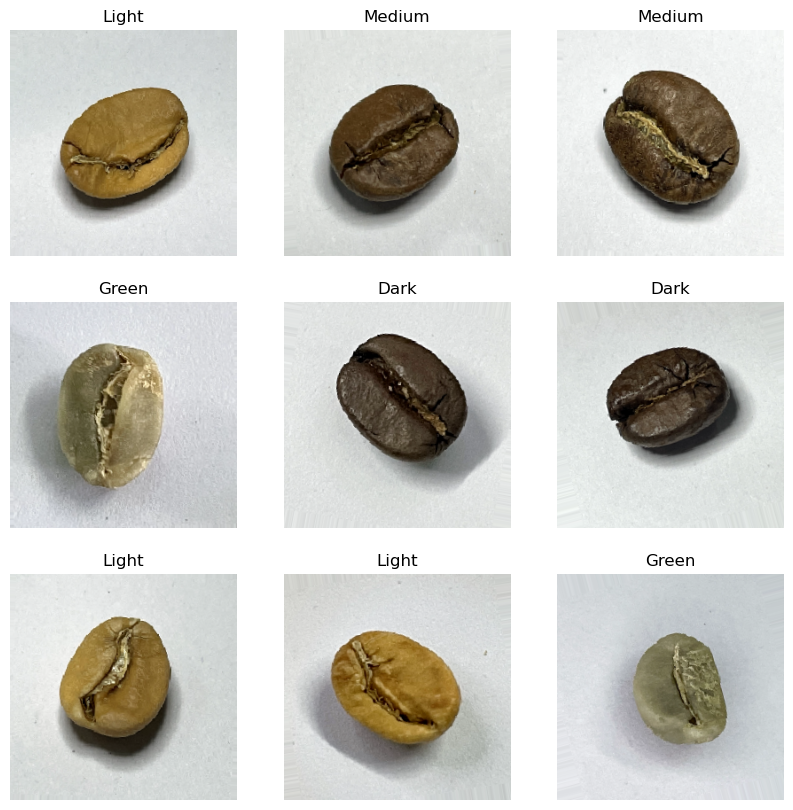

In [4]:
#show the train_dataset with 10 img
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
i=1
for images, labels in iter(train_dataset):
    image_id = np.random.randint(len(images))
    image = images[image_id]
    label = labels[image_id]
    plt.subplot(3,3,i)
    plt.imshow(image)
    plt.title(class_names[int(label)])
    plt.axis('off')
    i+=1
    if i==10: break
plt.show()


In [5]:
# Xception
base_model_1 = tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(256,256,3))
base_model_1.trainable = False


# defining Sequential model with layer
model_1 = Sequential([base_model_1, GlobalAvgPool2D(),Dense(256, activation='relu'),Dropout(0.2),Dense(number_of_classes, activation='softmax')])


# compiling a model wich model loss, optimizer, metrics setting
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#callbacks epochs with no improvement to wait before stopping the training process
#save the weights of the best performing
callback = [EarlyStopping(patience=5, restore_best_weights=True), ModelCheckpoint("Xception" + ".h5", save_best_only=True)]

# training the model on the training dataset evaluating it on the validation dataset
model_1.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=callback)

2023-05-06 19:31:35.751178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
30/30 [==============================] - 101s 3s/step - loss: 0.4139 - accuracy: 0.8354 - val_loss: 0.1647 - val_accuracy: 0.9333
Epoch 2/10
30/30 [==============================] - 105s 4s/step - loss: 0.1640 - accuracy: 0.9406 - val_loss: 0.1598 - val_accuracy: 0.9292
Epoch 3/10
30/30 [==============================] - 107s 4s/step - loss: 0.1311 - accuracy: 0.9542 - val_loss: 0.1898 - val_accuracy: 0.9375
Epoch 4/10
30/30 [==============================] - 103s 3s/step - loss: 0.1099 - accuracy: 0.9583 - val_loss: 0.2350 - val_accuracy: 0.9042
Epoch 5/10
30/30 [==============================] - 101s 3s/step - loss: 0.1234 - accuracy: 0.9583 - val_loss: 0.1745 - val_accuracy: 0.9375
Epoch 6/10
30/30 [==============================] - 100s 3s/step - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0815 - val_accuracy: 0.9625
Epoch 7/10
30/30 [==============================] - 99s 3s/step - loss: 0.0564 - accuracy: 0.9781 - val_loss: 0.1797 - val_accuracy: 0.9167
Epoch 8/10
30/

In [6]:
#evaluate model_1 with test dataset
model_1.evaluate(test_dataset)

13/13 [==============================] - 31s 2s/step - loss: 0.0480 - accuracy: 0.9900


[0.04800810664892197, 0.9900000095367432]

1/1 [==============================] - 0s 122ms/step


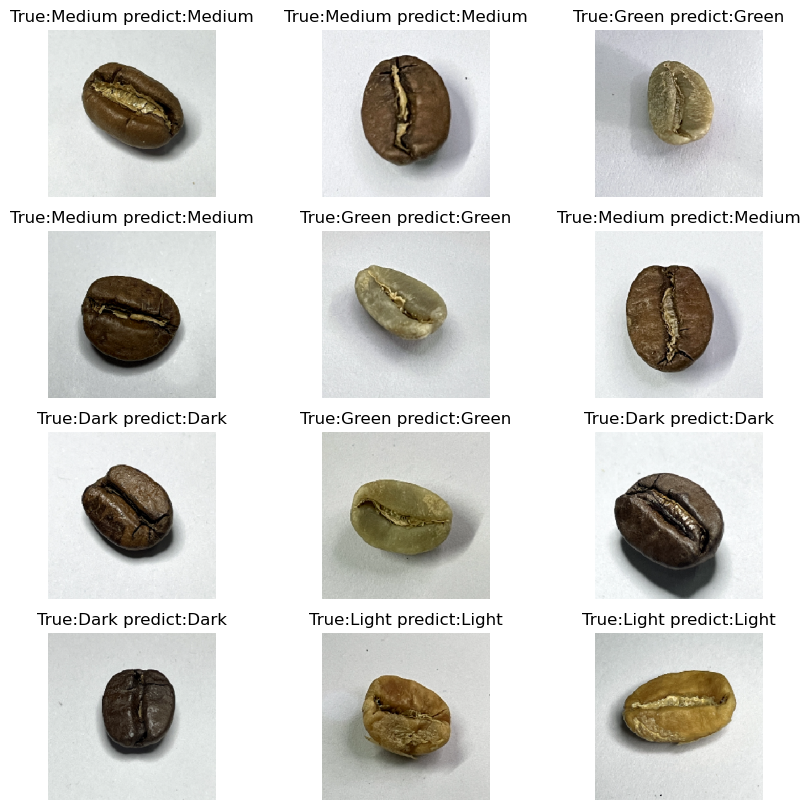

In [9]:
# creates a new figure
plt.figure(figsize=(10,10))
i=1
for images, labels in iter(test_dataset):
    
    # randomly select images
    image_id = np.random.randint(len(images))
    image = images[image_id]
    label = labels[image_id]

    # predicted label base on model
    predict_prob=model_1.predict(image[np.newaxis,...])
    predict_index=int(np.argmax(predict_prob))
    predict_label = class_names[predict_index]
    plt.subplot(4,3,i)
    plt.imshow(image)
    plt.title(f'True:{class_names[int(label)]} predict:{predict_label}')
    plt.axis('off')
    i+=1
    if i==13: break
plt.show()

In [10]:

# ResNet50V2
base_model_2 = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False, weights='imagenet', input_shape=(256,256,3))
base_model_2.trainable = False

# defining Sequential model with layer
model2 = Sequential([base_model_2, GlobalAvgPool2D(),Dense(256, activation='relu'),Dropout(0.2),Dense(number_of_classes, activation='softmax')])

# compiling a model wich model loss, optimizer, metrics setting
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#callbacks epochs with no improvement to wait before stopping the training process
#save the weights of the best performing
callback = [EarlyStopping(patience=5, restore_best_weights=True), ModelCheckpoint("ResNet50V2" + ".h5", save_best_only=True)]

# training the model on the training dataset evaluating it on the validation dataset
model2.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=callback)

Epoch 1/10
30/30 [==============================] - 77s 3s/step - loss: 0.5547 - accuracy: 0.7812 - val_loss: 0.1417 - val_accuracy: 0.9500
Epoch 2/10
30/30 [==============================] - 75s 3s/step - loss: 0.1342 - accuracy: 0.9500 - val_loss: 0.1227 - val_accuracy: 0.9458
Epoch 3/10
30/30 [==============================] - 74s 2s/step - loss: 0.0895 - accuracy: 0.9708 - val_loss: 0.1030 - val_accuracy: 0.9708
Epoch 4/10
30/30 [==============================] - 75s 3s/step - loss: 0.0979 - accuracy: 0.9552 - val_loss: 0.0863 - val_accuracy: 0.9667
Epoch 5/10
30/30 [==============================] - 75s 2s/step - loss: 0.0797 - accuracy: 0.9656 - val_loss: 0.0866 - val_accuracy: 0.9667
Epoch 6/10
30/30 [==============================] - 75s 2s/step - loss: 0.0588 - accuracy: 0.9802 - val_loss: 0.0430 - val_accuracy: 0.9917
Epoch 7/10
30/30 [==============================] - 75s 2s/step - loss: 0.0442 - accuracy: 0.9844 - val_loss: 0.0608 - val_accuracy: 0.9833
Epoch 8/10
30/30 [==

In [11]:
model2.evaluate(test_dataset)

13/13 [==============================] - 24s 2s/step - loss: 0.0523 - accuracy: 0.9750


[0.05228067561984062, 0.9750000238418579]

1/1 [==============================] - 0s 106ms/step


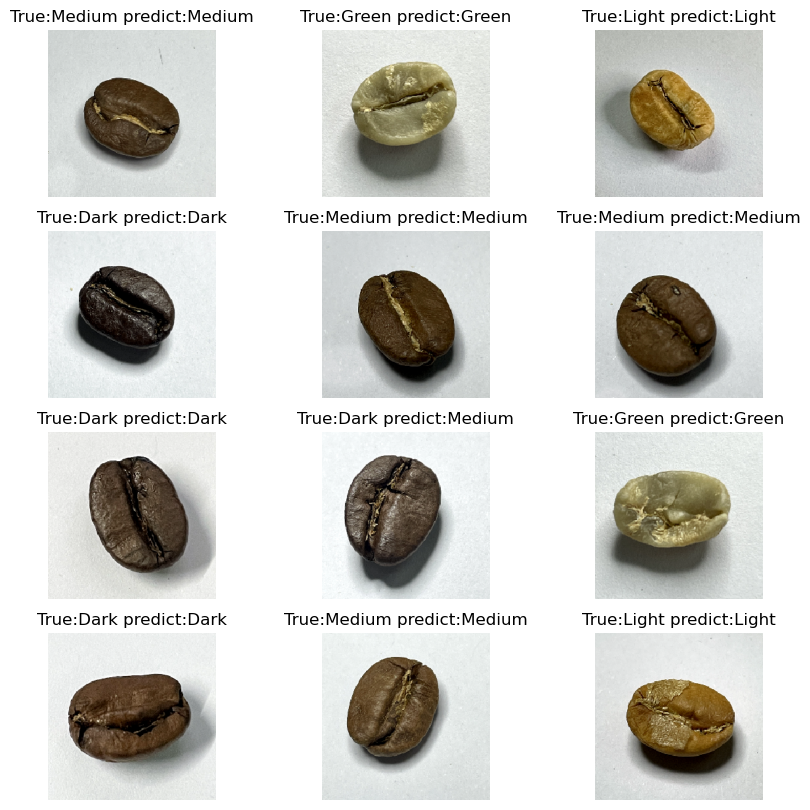

In [13]:
# creates a new figure
plt.figure(figsize=(10,10))
i=1
for images, labels in iter(test_dataset):
    
    # randomly select images
    image_id = np.random.randint(len(images))
    image = images[image_id]
    label = labels[image_id]

    # predicted label base on model
    predict_prob=model2.predict(image[np.newaxis,...])
    predict_index=int(np.argmax(predict_prob))
    predict_label = class_names[predict_index]
    plt.subplot(4,3,i)
    plt.imshow(image)
    plt.title(f'True:{class_names[int(label)]} predict:{predict_label}')
    plt.axis('off')
    i+=1
    if i==13: break
plt.show()

In [14]:
# vgg16
base_model_3 = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(256,256,3))
base_model_3.trainable = False

# defining Sequential model with layer
model3 = Sequential([base_model_3, GlobalAvgPool2D(),Dense(256, activation='relu'),Dropout(0.2),Dense(number_of_classes, activation='softmax')])


# compiling a model wich model loss, optimizer, metrics setting
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#callbacks epochs with no improvement to wait before stopping the training process
#save the weights of the best performing
callback = [EarlyStopping(patience=5, restore_best_weights=True), ModelCheckpoint("VGG16" + ".h5", save_best_only=True)]
# training the model on the training dataset evaluating it on the validation dataset
model3.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=callback)

Epoch 1/10
30/30 [==============================] - 272s 9s/step - loss: 1.3451 - accuracy: 0.3396 - val_loss: 1.1783 - val_accuracy: 0.5917
Epoch 2/10
30/30 [==============================] - 271s 9s/step - loss: 1.0658 - accuracy: 0.6271 - val_loss: 1.0160 - val_accuracy: 0.6708
Epoch 3/10
30/30 [==============================] - 272s 9s/step - loss: 0.8932 - accuracy: 0.7198 - val_loss: 0.9252 - val_accuracy: 0.5500
Epoch 4/10
30/30 [==============================] - 269s 9s/step - loss: 0.7425 - accuracy: 0.7604 - val_loss: 0.7646 - val_accuracy: 0.7833
Epoch 5/10
30/30 [==============================] - 269s 9s/step - loss: 0.6157 - accuracy: 0.8104 - val_loss: 0.6746 - val_accuracy: 0.7667
Epoch 6/10
30/30 [==============================] - 269s 9s/step - loss: 0.5397 - accuracy: 0.8385 - val_loss: 0.6179 - val_accuracy: 0.8042
Epoch 7/10
30/30 [==============================] - 270s 9s/step - loss: 0.4676 - accuracy: 0.8719 - val_loss: 0.5669 - val_accuracy: 0.8375
Epoch 8/10
30

In [18]:
model3.evaluate(test_dataset)

13/13 [==============================] - 92s 7s/step - loss: 0.3306 - accuracy: 0.9025


[0.3305965065956116, 0.9024999737739563]

1/1 [==============================] - 0s 302ms/step


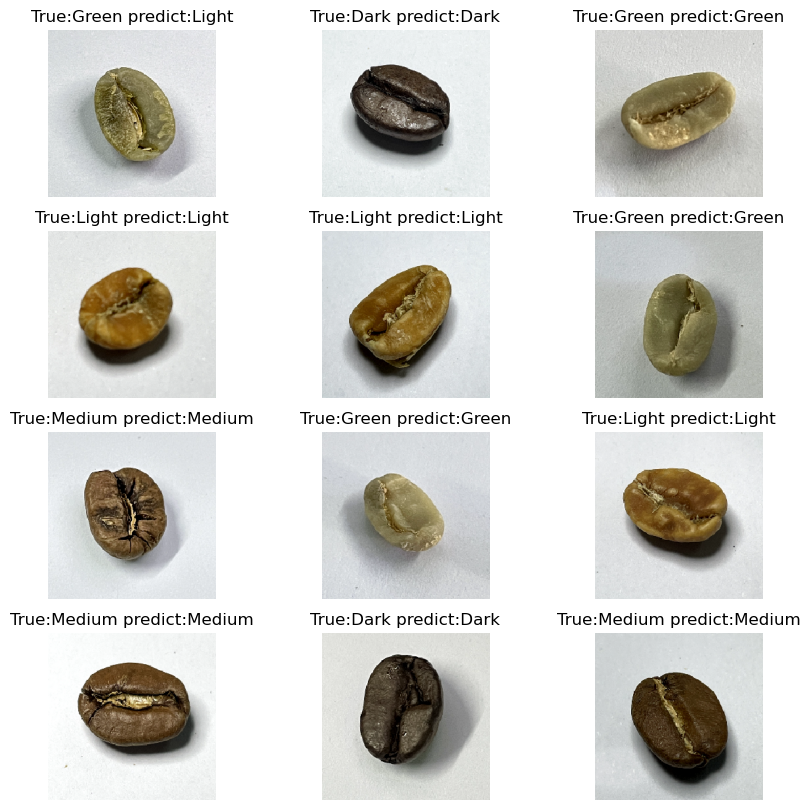

In [17]:
# creates a new figure
plt.figure(figsize=(10,10))
i=1
for images, labels in iter(test_dataset):
    
    # randomly select images
    image_id = np.random.randint(len(images))
    image = images[image_id]
    label = labels[image_id]
    # predicted label base on model
    predict_prob=model3.predict(image[np.newaxis,...])
    predict_index=int(np.argmax(predict_prob))
    predict_label = class_names[predict_index]
    plt.subplot(4,3,i)
    plt.imshow(image)
    plt.title(f'True:{class_names[int(label)]} predict:{predict_label}')
    plt.axis('off')
    i+=1
    if i==13: break
plt.show()